In [1]:
from metaspace import SMInstance
import metaspace2anndata
from metaspace_converter import metaspace_to_anndata, anndata_to_image_array
from anndata import AnnData
import numpy as np
import pandas as pd

In [2]:
adata2 = metaspace_to_anndata(
    dataset_id="2023-11-14_21h58m39s",
    fdr=0.1)


100%|████████████████████████████████████████| 20/20 [00:00<00:00, 27.39it/s]


In [3]:
'ion_image_pixel_y' in adata2.obs.columns

True

In [4]:
adata2.uns['metaspace']['image_size']

{'x': 143, 'y': 130}

In [5]:
anndata_to_image_array(adata2).shape

(20, 130, 143)

In [7]:
adata = metaspace_to_anndata(
    dataset_id="2022-08-05_17h28m56s",
    fdr=0.1,
    database=("BraChemDB", "2018-01"),
    add_optical_image=True,
)

anndata_to_image_array(adata).shape

100%|████████████████████████████████████████| 6/6 [00:00<00:00, 29.01it/s]


(6, 61, 78)

In [8]:
anndata_to_image_array(adata).shape

(6, 61, 78)

In [9]:
img_array = anndata_to_image_array(adata)

assert img_array.shape == (adata.shape[1], 
                           adata.obs['ion_image_pixel_y'].max()+1, 
                           adata.obs['ion_image_pixel_x'].max()+1)

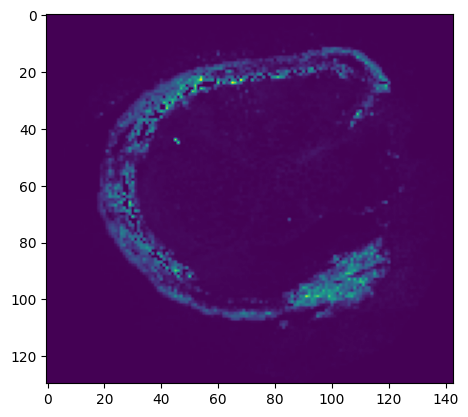

In [10]:
import matplotlib.pyplot as plt
resort = adata2.obs.sort_values(['ion_image_pixel_x', 'ion_image_pixel_y']).index.values.astype(int)
adata3 = adata2.copy()
adata3 = adata3[resort, :]
adata3.obs = adata3.obs.reset_index(drop=True)

plt.imshow(anndata_to_image_array(adata3)[3])

In [113]:
adata3.obs

,ion_image_pixel_x,ion_image_pixel_y,ion_image_shape_y,ion_image_shape_x
0,0,0,130,143
1,0,1,130,143
2,0,2,130,143
3,0,3,130,143
4,0,4,130,143
...,...,...,...,...
18585,142,125,130,143
18586,142,126,130,143
18587,142,127,130,143
18588,142,128,130,143


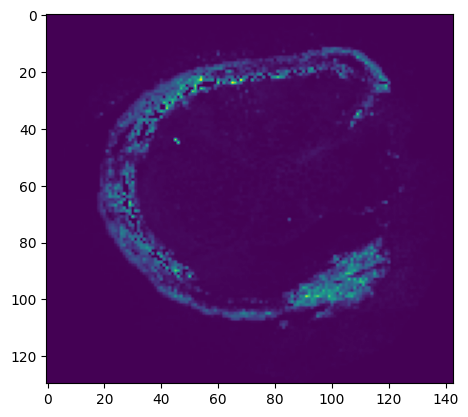

In [102]:
import matplotlib.pyplot as plt
plt.imshow(anndata_to_image_array(adata2)[3])

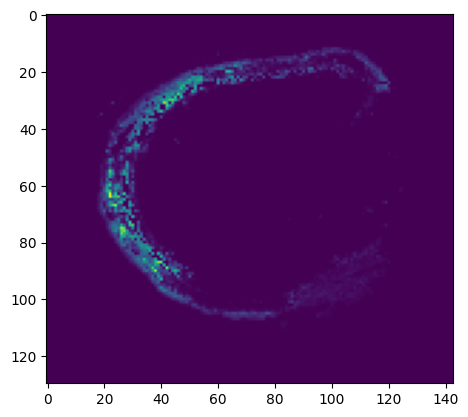

In [76]:
plt.imshow(anndata_to_image_array(adata1)[1])

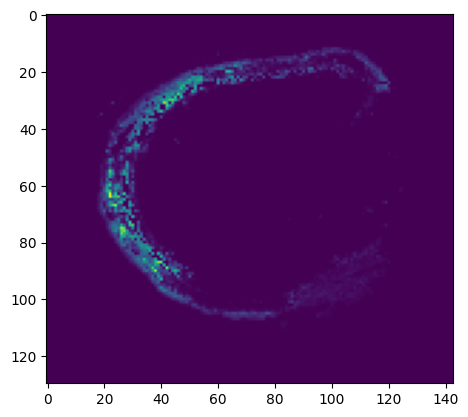

In [75]:
plt.imshow(raw_imgs[1][0])

In [122]:
adata2.uns

OrderedDict([('metaspace',
              {'id': '2023-11-14_21h58m39s',
               'name': 'lln6_100+cm_pos',
               'adducts': ['+H', '+Na', '+K'],
               'databases': ['HMDB', 'KEGG', 'BraChemDB', 'ChEBI'],
               'database_details': [{'id': 22,
                 'name': 'HMDB',
                 'version': 'v4',
                 'isPublic': True,
                 'archived': False},
                {'id': 374,
                 'name': 'KEGG',
                 'version': 'v1',
                 'isPublic': True,
                 'archived': False},
                {'id': 18,
                 'name': 'BraChemDB',
                 'version': '2018-01',
                 'isPublic': True,
                 'archived': False},
                {'id': 19,
                 'name': 'ChEBI',
                 'version': '2018-01',
                 'isPublic': True,
                 'archived': False}],
               'polarity': 'Positive',
               'image_size': {

In [124]:
adata1.uns

OrderedDict([('spatial',
              {'image': {'images': {},
                'scalefactors': {'tissue_hires_scalef': 1,
                 'spot_diameter_fullres': 0.5}}}),
             ('metaspace_metadata',
              {'Data_Type': 'Imaging MS',
               'Sample_Information': {'Condition': '100+ cm',
                'Organism': 'Gilbert_root',
                'Organism_Part': 'Root',
                'Sample_Growth_Conditions': ''},
               'Sample_Preparation': {'MALDI_Matrix': '2,5-dihydroxybenzoic acid (DHB)',
                'Tissue_Modification': 'None',
                'Sample_Stabilisation': 'HPMC/PVP',
                'MALDI_Matrix_Application': 'HTX',
                'Solvent': '70% MeOH'},
               'MS_Analysis': {'Polarity': 'Positive',
                'Ionisation_Source': 'MALDI',
                'Analyzer': '12 T FTICR',
                'Detector_Resolving_Power': {'Resolving_Power': 100000,
                 'mz': 400},
                'Pixel_Size':